---

<h1 style="text-align: center;font-size: 40px;">Late Night Show Analysis</h1>

---

<center><img src="https://media.giphy.com/media/3o7btOam1zAdEW6vMQ/giphy.gif"></center>

---

<h4>A late-night talk show is a genre of talk show popular in the United States, where the format originated. It is generally structured around humorous monologues about the day's news, guest interviews, comedy sketches and music performances. It is characterized by spontaneous conversation, and for an effect of immediacy and intimacy as if the host was speaking alone to each of the millions of audience members.Late-night talk shows are also fundamentally shaped by the personality of the host, which constitutes the "trademark" of the show</h4>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/late-night-talk-show-youtube-dataset/Stephen_Colbert.csv
/kaggle/input/late-night-talk-show-youtube-dataset/Conan.csv
/kaggle/input/late-night-talk-show-youtube-dataset/James_Corden.csv
/kaggle/input/late-night-talk-show-youtube-dataset/Seth_Meyers.csv
/kaggle/input/late-night-talk-show-youtube-dataset/Jimmy_Kimmel.csv
/kaggle/input/late-night-talk-show-youtube-dataset/Jimmy_Fallon.csv


In [2]:
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

In [3]:
conan = pd.read_csv("/kaggle/input/late-night-talk-show-youtube-dataset/Conan.csv")
conan.head()

,publishedAtSQL,videoTitle,videoDescription,videoCategoryId,videoCategoryLabel,durationSec,definition,caption,licensedContent,viewCount,likeCount,dislikeCount,commentCount
0,12-06-2020 12:00,Deon Cole On White Protester Signs That Missed...,Deon Cole shares some white protester signs th...,23,Comedy,124,hd,False,1.0,98817.0,3161.0,186.0,368.0
1,11-06-2020 23:34,Nicole Byer On Finding Humor In Pain - CONAN o...,Nicole Byer on racial inequality in healthcare...,23,Comedy,1200,hd,True,1.0,48337.0,1884.0,115.0,318.0
2,11-06-2020 23:32,Sona Crashes Conan's Interview With Nicole Bye...,"Sona is a huge fan of Nicole Byer, “Nailed It!...",23,Comedy,52,hd,True,1.0,57277.0,1992.0,47.0,147.0
3,11-06-2020 00:00,Senator Cory Booker On This Crossroads In Amer...,Senator Cory Booker discusses the killing of G...,23,Comedy,1917,hd,False,1.0,26466.0,796.0,338.0,399.0
4,10-06-2020 21:03,Senator Cory Booker Wants This To Be A Moral M...,Senator Cory Booker discusses President Trump’...,23,Comedy,447,hd,True,1.0,19033.0,491.0,336.0,264.0


In [4]:
conan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8725 entries, 0 to 8724
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   publishedAtSQL      8725 non-null   object 
 1   videoTitle          8725 non-null   object 
 2   videoDescription    8723 non-null   object 
 3   videoCategoryId     8723 non-null   object 
 4   videoCategoryLabel  8723 non-null   object 
 5   durationSec         8723 non-null   object 
 6   definition          8723 non-null   object 
 7   caption             8722 non-null   object 
 8   licensedContent     8636 non-null   float64
 9   viewCount           8723 non-null   float64
 10  likeCount           8723 non-null   float64
 11  dislikeCount        8723 non-null   float64
 12  commentCount        8715 non-null   float64
dtypes: float64(5), object(8)
memory usage: 886.3+ KB


In [5]:
conan.isnull().sum()

publishedAtSQL         0
videoTitle             0
videoDescription       2
videoCategoryId        2
videoCategoryLabel     2
durationSec            2
definition             2
caption                3
licensedContent       89
viewCount              2
likeCount              2
dislikeCount           2
commentCount          10
dtype: int64

<h4> There are some column which we don't need for Data Visualization ,so let's drop these Columns </h4>

In [6]:
conan.drop(["videoDescription","licensedContent"],axis = 1,inplace=True)
conan.head()

,publishedAtSQL,videoTitle,videoCategoryId,videoCategoryLabel,durationSec,definition,caption,viewCount,likeCount,dislikeCount,commentCount
0,12-06-2020 12:00,Deon Cole On White Protester Signs That Missed...,23,Comedy,124,hd,False,98817.0,3161.0,186.0,368.0
1,11-06-2020 23:34,Nicole Byer On Finding Humor In Pain - CONAN o...,23,Comedy,1200,hd,True,48337.0,1884.0,115.0,318.0
2,11-06-2020 23:32,Sona Crashes Conan's Interview With Nicole Bye...,23,Comedy,52,hd,True,57277.0,1992.0,47.0,147.0
3,11-06-2020 00:00,Senator Cory Booker On This Crossroads In Amer...,23,Comedy,1917,hd,False,26466.0,796.0,338.0,399.0
4,10-06-2020 21:03,Senator Cory Booker Wants This To Be A Moral M...,23,Comedy,447,hd,True,19033.0,491.0,336.0,264.0


<h3> Let's see the whole Profile of our Dataset </h3>

In [7]:
profile = pandas_profiling.ProfileReport(conan)
profile

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


<h3>There are some Null Values ,so let's drop these null Values</h3>

In [8]:
cat = ["videoCategoryId","videoCategoryLabel","durationSec","definition","caption","viewCount","likeCount","dislikeCount","commentCount"]
for value in cat:
    conan[value].fillna(conan[value].mode()[0],inplace=True)

In [9]:
conan.isnull().sum()

publishedAtSQL        0
videoTitle            0
videoCategoryId       0
videoCategoryLabel    0
durationSec           0
definition            0
caption               0
viewCount             0
likeCount             0
dislikeCount          0
commentCount          0
dtype: int64

<h4> Now there is no null Values,so  now we can visualize  the data </h4>

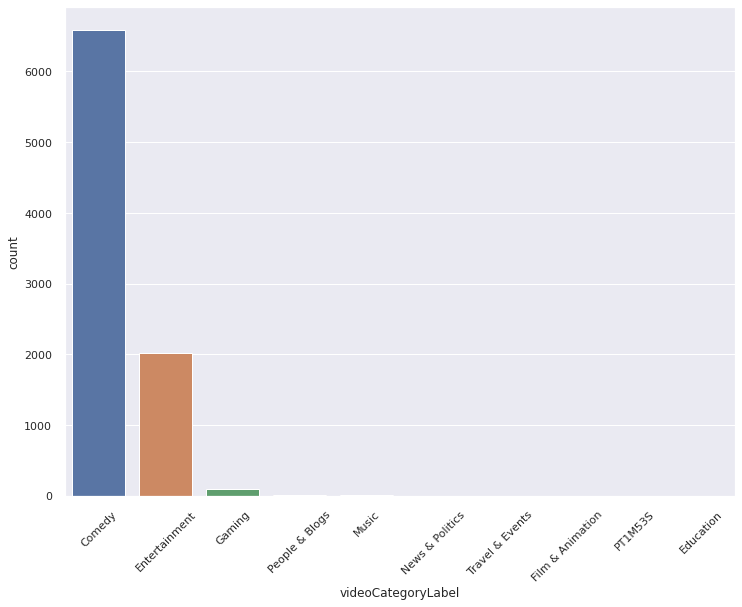

In [10]:
sns.set()
plt.figure(figsize=(12,9))
colors=['Red','Blue','Green','Magenta','Orange','Brown','Yellow','Purple','Pink','Cyan']
sns.countplot(x="videoCategoryLabel",data=conan,order = conan["videoCategoryLabel"].value_counts().index[0:10])
plt.xticks(rotation=45)
plt.show()

<h4>So Conan Show provides a lot number of Comedy Videos </h4>

<h3> Let's see which type of Videos People Likes the most </h3>

<Figure size 1152x648 with 0 Axes>

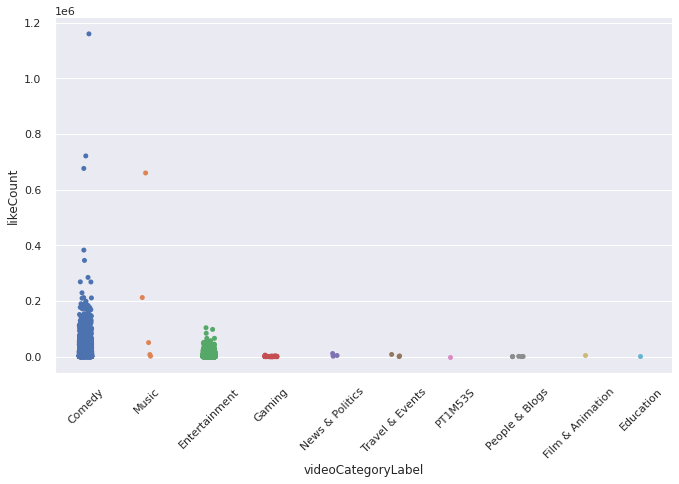

In [11]:
sns.set()
plt.figure(figsize=(16,9))
sns.catplot(x="videoCategoryLabel",y="likeCount",hue = "videoCategoryLabel",data=conan,aspect=1.6,height=6)
plt.xticks(rotation=45)
plt.show()

<h4>Hmm.... Pepole Likes the comedy Videos a lot</h4>

<h3> Let's see Relation between Comment  & Dislikes </h3>

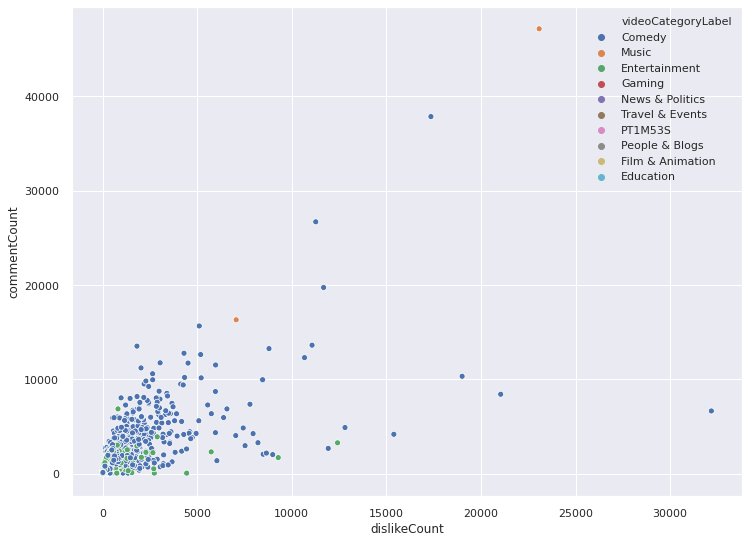

In [12]:
sns.set()
plt.figure(figsize=(12,9))
sns.scatterplot(x="dislikeCount",y="commentCount",hue="videoCategoryLabel",data= conan)


<h4> Most of the Dislike & Comments are between 5000 & 10000 </h4>

<h3> Pie Chart of Likes Count according Shows </h3>

In [13]:
fig = px.pie(conan,values = "likeCount",names ="videoCategoryLabel",labels= conan["videoCategoryLabel"],opacity=1)
fig.update_traces(textposition ='inside',textinfo='percent+label')
fig.show()

<h3>Let's see how the number of views changed according to Duration of the Videos </h3> </h3>

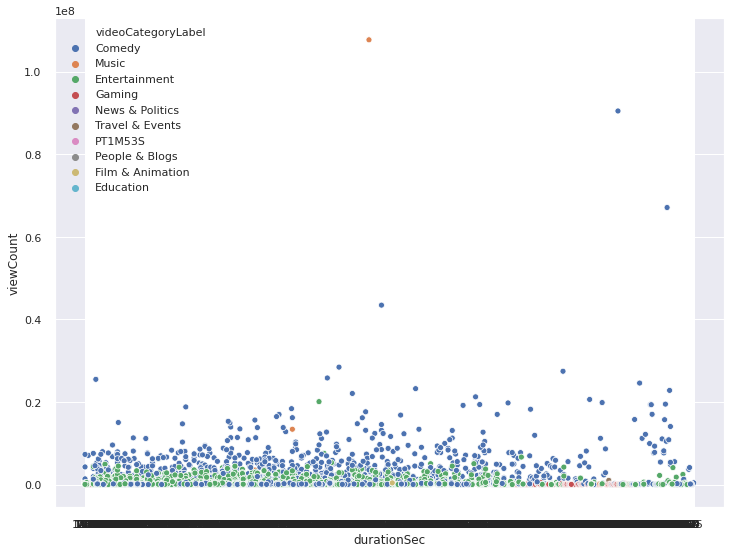

In [14]:
sns.set()
plt.figure(figsize=(12,9))
sns.scatterplot(x="durationSec",y="viewCount",hue="videoCategoryLabel",data=conan)

<h4>So i think there is no relation between duration & view.So that means People Loves to watch Conan Show</h4>

<h3> Let's see  which type of video gets the most number of Dislikes </h3>

<Figure size 1152x648 with 0 Axes>

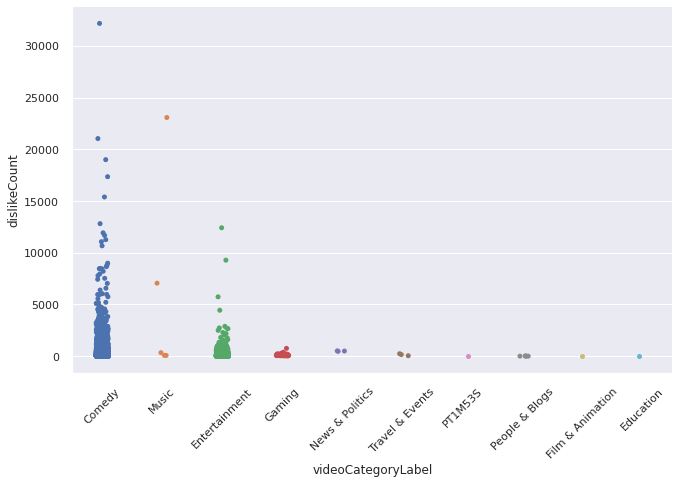

In [15]:
sns.set()
plt.figure(figsize=(16,9))
sns.catplot(x="videoCategoryLabel",y="dislikeCount",hue = "videoCategoryLabel",data=conan,aspect=1.6,height=6)
plt.xticks(rotation=45)
plt.show()

In [16]:
com_dis = conan.dislikeCount[conan["videoCategoryLabel"] == "Comedy"].sum()
ent_dis = conan.dislikeCount[conan["videoCategoryLabel"] == "Entertainment"].sum()
game_dis = conan.dislikeCount[conan["videoCategoryLabel"] == "Game"].sum()
mus_dis = conan.dislikeCount[conan["videoCategoryLabel"] == "Music"].sum()

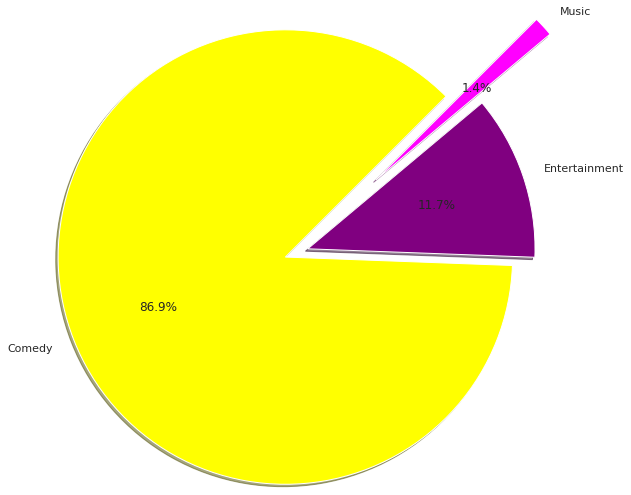

In [17]:
values = [com_dis,ent_dis,mus_dis]
labels= ["Comedy","Entertainment","Music"]
explode=(0.1,0.1,0.9)
color = ['Yellow','Purple','Magenta']
plt.pie(values,explode=explode,radius=1.9,startangle=45,colors=color,labels=labels,autopct="%0.1f%%",shadow = True)
plt.show()

<h4>Conan show provides a lot of Comedy Videos,  people loves  Some of them & Dislikes some of them,Since the number of comedy videos are high ,that's why ,the percentage of likes & Dislikes are High </h4>

<h3> Let's Find out  the day with the most number of Video Released </h3>

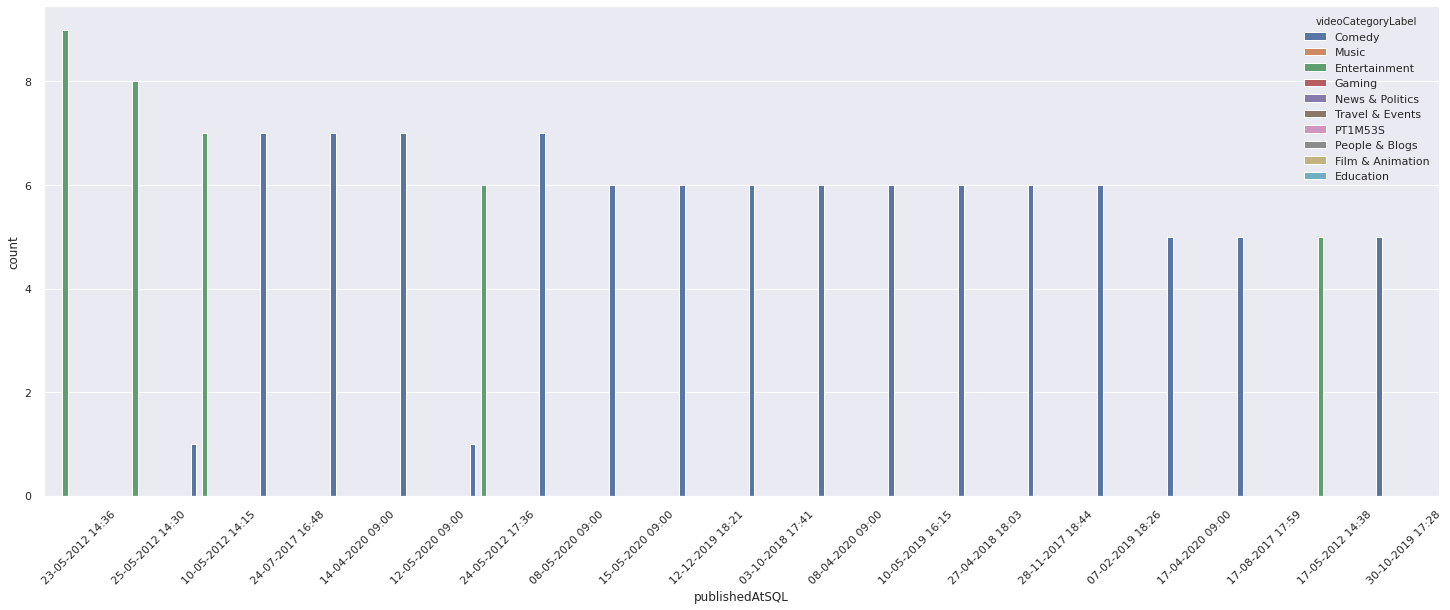

In [18]:
sns.set()
plt.figure(figsize=(25,9))
sns.countplot(x="publishedAtSQL",data= conan,hue= "videoCategoryLabel",order = conan['publishedAtSQL'].value_counts().index[0:20])
plt.xticks(rotation=45)
plt.show()

<h4>So at 23-05-2012 they published 9 videos at a single Day </h4>

<h3> Let's find out Percentage of Likes according to view, of different types of videos </h3>

In [19]:
sum_com = conan[conan["videoCategoryLabel"]=="Comedy"].sum()
sum_music = conan[conan["videoCategoryLabel"]=="Music"].sum()
sum_ent = conan[conan["videoCategoryLabel"]=="Entertainment"].sum()
sum_gam = conan[conan["videoCategoryLabel"]=="Gaming"].sum()
sum_np = conan[conan["videoCategoryLabel"]=="News & Politics"].sum()
sum_te = conan[conan["videoCategoryLabel"]=="Travel & Events"].sum()
sum_pt = conan[conan["videoCategoryLabel"]=="PT1M53S"].sum()
sum_fa = conan[conan["videoCategoryLabel"]=="Film & Animation"].sum()
sum_pb = conan[conan["videoCategoryLabel"]=="People & Blogs"].sum()
sum_edu = conan[conan["videoCategoryLabel"]=="Education"].sum()


prct_com = (sum_com["likeCount"] / sum_com["viewCount"])*100
prct_mus = (sum_music["likeCount"] / sum_music["viewCount"])*100
prct_ent = (sum_ent["likeCount"] / sum_ent["viewCount"])*100
prct_gam = (sum_gam["likeCount"] / sum_gam["viewCount"])*100
prct_te = (sum_te["likeCount"] / sum_te["viewCount"])*100
prct_fa = (sum_fa["likeCount"] / sum_fa["viewCount"])*100
prct_pb = (sum_pb["likeCount"] / sum_pb["viewCount"])*100
prct_edu = (sum_edu["likeCount"] / sum_edu["viewCount"])*100
prct_np =  (sum_np["likeCount"] / sum_np["viewCount"])*100
prct_pt =  (sum_pt["likeCount"] / sum_pt["viewCount"])*100




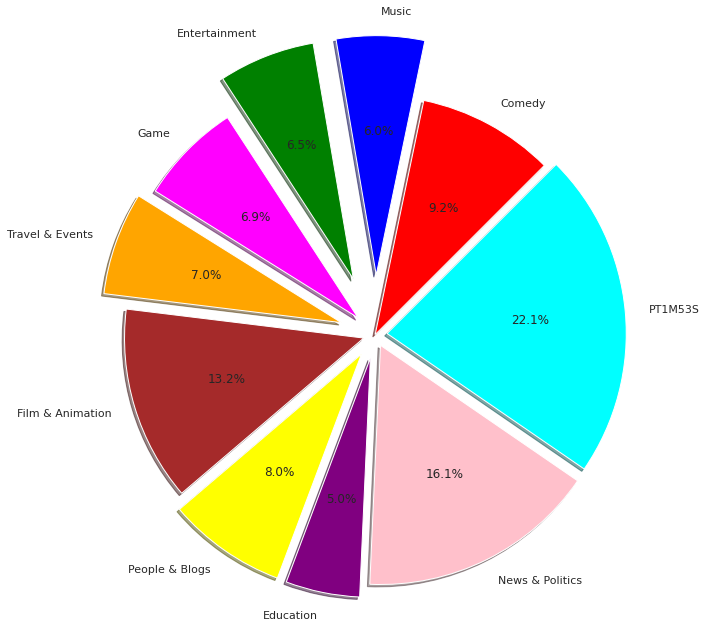

In [20]:
values=[prct_com,prct_mus,prct_ent,prct_gam,prct_te,prct_fa,prct_pb,prct_edu,prct_np,prct_pt]
labels=['Comedy','Music','Entertainment',"Game","Travel & Events","Film & Animation","People & Blogs","Education","News & Politics","PT1M53S"]
plt.axis('equal')
explode=(0,0.5,0.5,0.2,0.3,0.1,0.2,0.2,0.1,0.1)
colors=['Red','Blue','Green','Magenta','Orange','Brown','Yellow','Purple','Pink','Cyan']
plt.pie(values,radius=2,autopct='%0.1f%%',shadow=True,explode=explode,startangle=45,labels=labels,colors=colors)
plt.show()

<h3>Let's Find out which type show gets the most number of Comments </h3>

In [21]:
cm = conan.groupby("videoCategoryLabel")["commentCount"].sum()
cm.head()

videoCategoryLabel
Comedy              3669249.0
Education               232.0
Entertainment        518984.0
Film & Animation        454.0
Gaming                 7076.0
Name: commentCount, dtype: float64

In [22]:
df_cm=pd.DataFrame({"Type": cm.index,"TotalComment":cm.values})
df_cm.nlargest(5,["TotalComment"])

,Type,TotalComment
0,Comedy,3669249.0
2,Entertainment,518984.0
5,Music,66983.0
4,Gaming,7076.0
6,News & Politics,2892.0


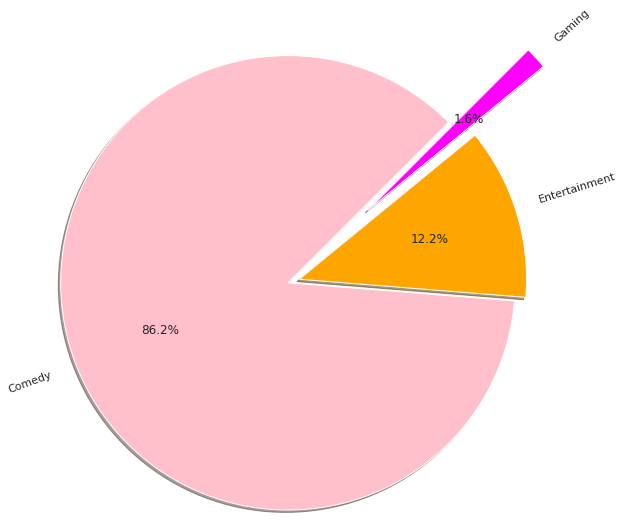

In [23]:
labels=['Comedy','Entertainment','Gaming']
explode=(0,0.1,0.9)
colors=['Pink','Orange','Magenta']
plt.pie(df_cm.nlargest(3,["TotalComment"])["TotalComment"],explode=explode,radius=1.9,colors=colors,startangle=45,labeldistance=1.1,rotatelabels=True,labels=labels,autopct="%0.1f%%",shadow = True)
plt.show()

<h4> So most of the People Loves to Comments on Comedy Videos </h4>

<h3>Let's see the Top 5 Videos with highest Number of Likes </h3>

In [24]:
like_cn = conan[["videoTitle","likeCount","videoCategoryLabel"]]
like = like_cn.nlargest(5,"likeCount")
like

,videoTitle,likeCount,videoCategoryLabel
4903,"Ice Cube, Kevin Hart And Conan Help A Student ...",1159144.0,Comedy
2754,James Veitch Is A Terrible Roommate - CONAN on...,720836.0,Comedy
6495,"Ice Cube, Kevin Hart, And Conan Share A Lyft Car",675928.0,Comedy
4675,"Disturbed ""The Sound Of Silence"" 03/28/16",659727.0,Music
5440,Jean-Claude Van Damme Recreates His “Kickboxer...,382739.0,Comedy


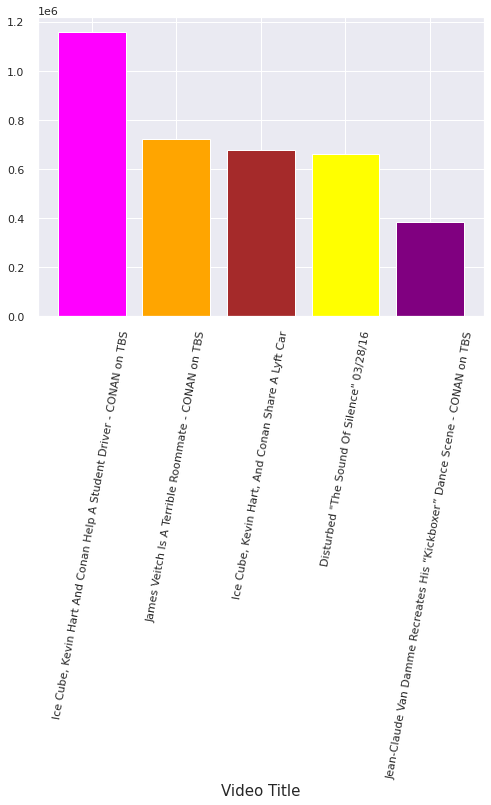

In [25]:
attributes = list(like.videoTitle)
values = list(like.likeCount)
plt.bar(attributes,values,color = ['Magenta','Orange','Brown','Yellow','Purple'])
plt.xticks(rotation = 80)
plt.xlabel("Video Title",fontsize=15)
plt.show()


<h4> This is the Top 5 Videos with highest Number of Likes </h4>

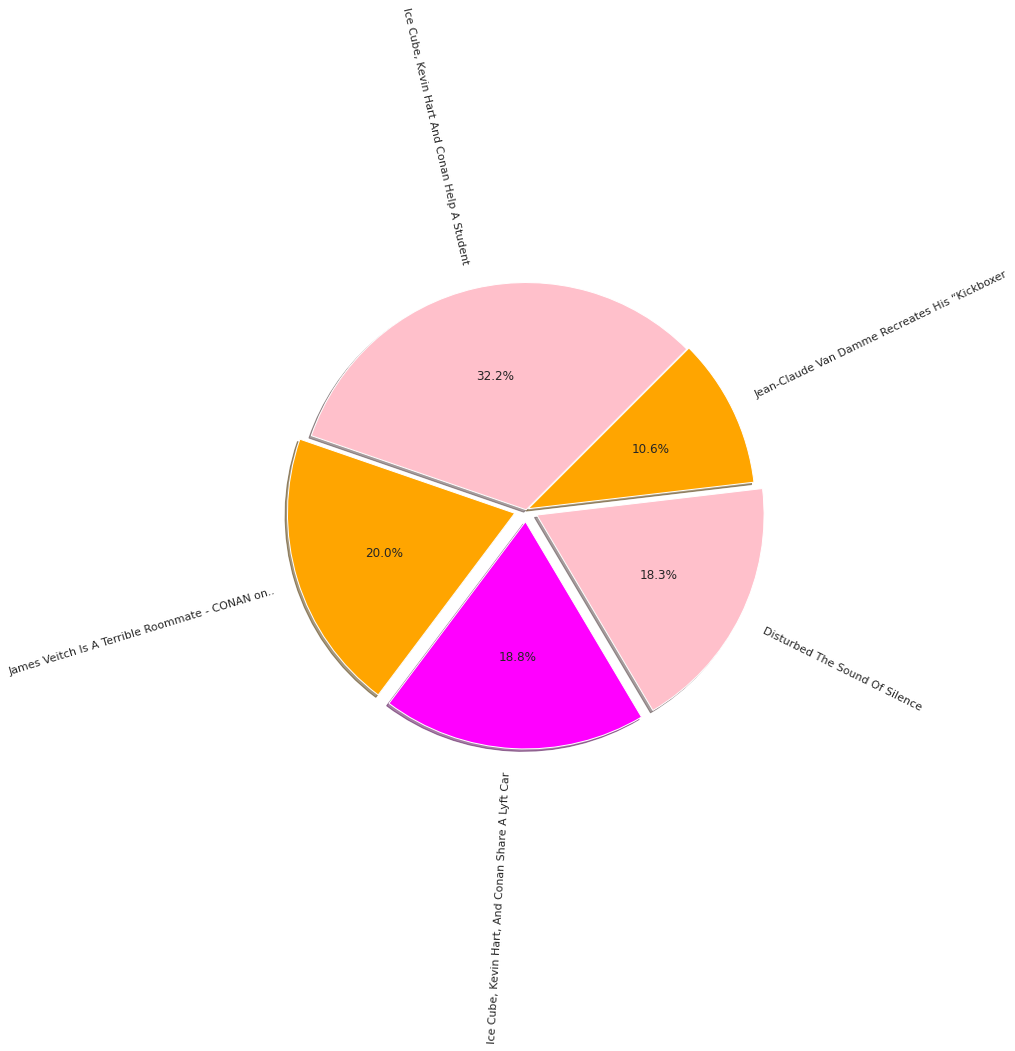

In [26]:
labels=['Ice Cube, Kevin Hart And Conan Help A Student','James Veitch Is A Terrible Roommate - CONAN on..','Ice Cube, Kevin Hart, And Conan Share A Lyft Car',
       "Disturbed The Sound Of Silence","Jean-Claude Van Damme Recreates His “Kickboxer"]
explode=(0,0.1,0.1,0.1,0.02)
colors=['Pink','Orange','Magenta']
plt.pie(like_cn.nlargest(5,["likeCount"])["likeCount"],explode=explode,radius=1.9,colors=colors,startangle=45,labeldistance=1.1,rotatelabels=True,labels=labels,autopct="%0.1f%%",shadow = True)
plt.show()

<h3> Let's see Top 5 Videos with Highest number of Comments </h3>

In [27]:
comment = conan[["videoTitle","commentCount","videoCategoryLabel"]]
a = comment.nlargest(5,"commentCount")
a

,videoTitle,commentCount,videoCategoryLabel
4675,"Disturbed ""The Sound Of Silence"" 03/28/16",47164.0,Music
4903,"Ice Cube, Kevin Hart And Conan Help A Student ...",37856.0,Comedy
8468,American Sniper Chris Kyle Interview - CONAN o...,26698.0,Comedy
6495,"Ice Cube, Kevin Hart, And Conan Share A Lyft Car",19733.0,Comedy
4628,"J.Y. Park ""Fire"" feat. Conan O'Brien & Steven ...",16307.0,Music


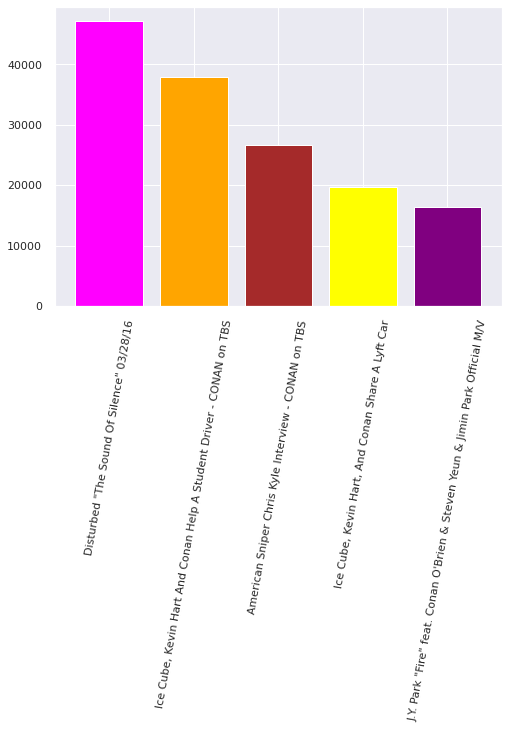

In [28]:
values = list(a.commentCount)
attribute = list(a.videoTitle)
plt.bar(attribute,values,color = ['Magenta','Orange','Brown','Yellow','Purple'])
plt.xticks(rotation = 80)
plt.show()

<h3>Let's make an Word Cloud of  videoTitle </h3>

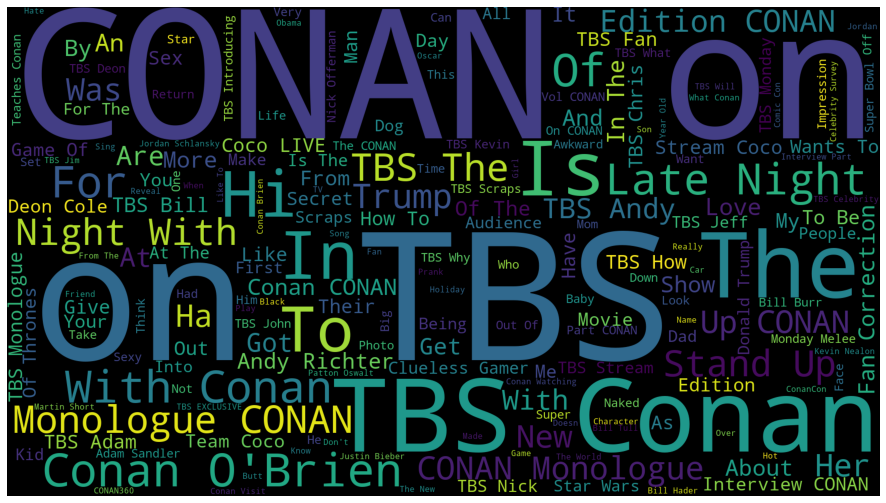

In [29]:
from wordcloud import WordCloud
plt.figure(figsize=(16,9))
wordcloud = WordCloud(
                          background_color='black',
                          width=1730,
                          height=970
                         ).generate(" ".join(conan.videoTitle))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('videotitle_WC.png')
plt.show() 